In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd /content/drive/MyDrive/FORAGE

/content/drive/MyDrive/FORAGE


In [4]:
!ls

BA


In [5]:
%cd BA

/content/drive/MyDrive/FORAGE/BA


In [6]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
reviews_df = pd.read_csv("BA_reviews.csv")

In [9]:
reviews_df.head()


,Unnamed: 0,reviews
0,0,Not Verified | This is the worst airline. Not...
1,1,✅ Trip Verified | I will never fly British Ai...
2,2,✅ Trip Verified | Worst aircraft I have ever ...
3,3,✅ Trip Verified | I enjoyed my flight. The bo...
4,4,✅ Trip Verified | Why do you make it so hard? ...


In [10]:
reviews_df.shape

(1000, 2)

In [11]:
reviews_df

,Unnamed: 0,reviews
0,0,Not Verified | This is the worst airline. Not...
1,1,✅ Trip Verified | I will never fly British Ai...
2,2,✅ Trip Verified | Worst aircraft I have ever ...
3,3,✅ Trip Verified | I enjoyed my flight. The bo...
4,4,✅ Trip Verified | Why do you make it so hard? ...
...,...,...
995,995,✅ Trip Verified | Glasgow to New York JFK via...
996,996,✅ Trip Verified | Flew on a last minute emerg...
997,997,"✅ Trip Verified | Earlier this year, my wife ..."
998,998,Not Verified | Los Angeles to London. I booke...


In [12]:
reviews_df.columns


Index(['Unnamed: 0', 'reviews'], dtype='object')

In [13]:
reviews_df.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [14]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
reviews_df.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [16]:
reviews_df.reviews[0:4]

0    Not Verified |  This is the worst airline. Not...
1    ✅ Trip Verified |  I will never fly British Ai...
2    ✅ Trip Verified |  Worst aircraft I have ever ...
3    ✅ Trip Verified |  I enjoyed my flight. The bo...
Name: reviews, dtype: object

In [17]:
dummy = reviews_df.reviews[0].split('|')[1].strip().lower()

In [18]:
dummy

'this is the worst airline. not one thing went right. i don’t understand how they have got it so bad. late take off, no gate when we arrived. bags took over 40 minutes to arrive. horrendous'

In [19]:
dummy_df_till4 = reviews_df.reviews[:4].apply(lambda x: x.split('|')[1].strip().lower())

In [20]:
dummy_df_till4

0    this is the worst airline. not one thing went ...
1    i will never fly british airways again. to sta...
2    worst aircraft i have ever flown. the seats we...
3    i enjoyed my flight. the boarding was swift an...
Name: reviews, dtype: object

In [21]:
rev_df = reviews_df

In [22]:
reviews_df.head()

,Unnamed: 0,reviews
0,0,Not Verified | This is the worst airline. Not...
1,1,✅ Trip Verified | I will never fly British Ai...
2,2,✅ Trip Verified | Worst aircraft I have ever ...
3,3,✅ Trip Verified | I enjoyed my flight. The bo...
4,4,✅ Trip Verified | Why do you make it so hard? ...


In [23]:
rev_df.reviews = rev_df.reviews.apply( lambda x: x.split('|')[1].strip().lower())

In [24]:
rev_df.head()

,Unnamed: 0,reviews
0,0,this is the worst airline. not one thing went ...
1,1,i will never fly british airways again. to sta...
2,2,worst aircraft i have ever flown. the seats we...
3,3,i enjoyed my flight. the boarding was swift an...
4,4,why do you make it so hard? after a so so loun...


In [25]:
rev_df.reviews.unique().__len__()

1000

In [26]:
import seaborn as sns
sns.set_palette('Set2')

import datetime as dt
import dateutil

import string

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk import tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

import importlib

In [27]:
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [28]:
sid = SentimentIntensityAnalyzer()
# https://www.kaggle.com/code/divyansh22/airline-review-data-preprocessing-pt-2-nlp?scriptVersionId=47891836&cellId=23


In [29]:
print(sid.polarity_scores("Forrest Gump is the best and the greatest movie of all time :)"))


{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'compound': 0.9081}


In [30]:
print(sid.polarity_scores("kill die hate fucking monster nigger"))

{'neg': 0.894, 'neu': 0.106, 'pos': 0.0, 'compound': -0.9576}


In [31]:
review_one = rev_df.reviews[0]
review_one_tok = tokenize.sent_tokenize(review_one)

In [32]:
print(review_one_tok)

['this is the worst airline.', 'not one thing went right.', 'i don’t understand how they have got it so bad.', 'late take off, no gate when we arrived.', 'bags took over 40 minutes to arrive.', 'horrendous']


In [33]:
# def transform_sid_score(score):
  # return (score +1)*5

review_one_score = 0
for tok in review_one_tok:
  review_one_score  += sid.polarity_scores(tok)['compound']

review_one_score /= len(review_one_tok)
print(round(review_one_score,4))

-0.3627


In [34]:
def judge_scores(dataframe, col):
  scores = []
  for i in dataframe[col]:
    i_tok = tokenize.sent_tokenize(i)
    score = 0
    for sentence in i_tok:
      score += sid.polarity_scores(sentence)['compound']
    score /= len(i_tok)
    scaled_score = (score  + 1)* 5
    scores.append(round(scaled_score,3))

  return scores


In [35]:
rev_df['scores'] = judge_scores(rev_df, 'reviews')

In [36]:
rev_df.head()

,Unnamed: 0,reviews,scores
0,0,this is the worst airline. not one thing went ...,3.186
1,1,i will never fly british airways again. to sta...,4.325
2,2,worst aircraft i have ever flown. the seats we...,3.823
3,3,i enjoyed my flight. the boarding was swift an...,6.287
4,4,why do you make it so hard? after a so so loun...,4.086


In [37]:
mean = np.mean(rev_df.scores)
median = np.median(rev_df.scores)
# mode = np.mode(rev_df.scores)

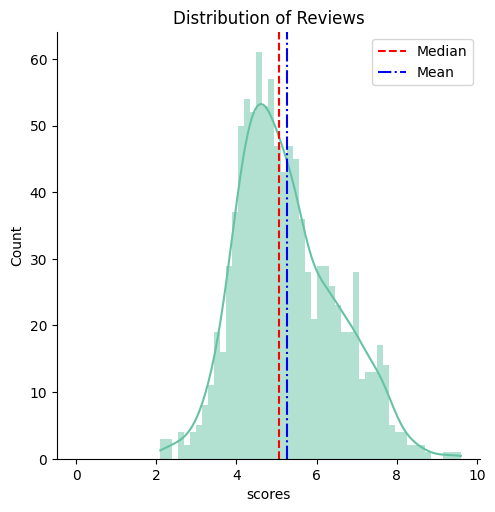

In [38]:
import matplotlib.pyplot as plt
from google.colab import files
sns.displot(data = rev_df , x = 'scores', kde = True, kind = 'hist', edgecolor = None, bins= 50)
plt.title('Distribution of Reviews')

plt.axvline(x=median, color='red', linestyle='--')
plt.axvline(x=mean, color='blue', linestyle='-.')
plt.plot(median, 'r--', label= 'Median')
plt.plot(mean, 'b-.', label="Mean")
plt.legend(loc = 'best')
# plt.savefig("review_distribution.png", bbox_inches='tight')
# files.download('review_distribution.png')


In [39]:
print('median is {:.3f} and mean is {:.3f}'.format(median, mean))

median is 5.054 and mean is 5.250


In [40]:
good_reviews = rev_df.scores[rev_df.scores > mean]
bad_reviews = rev_df.scores[rev_df.scores <= mean]

In [41]:
[good, bad] = [len(good_reviews), len(bad_reviews)]

In [42]:
print(good, bad)

442 558


In [43]:
total = good + bad

good_perc, bad_perc = good/total, bad/total

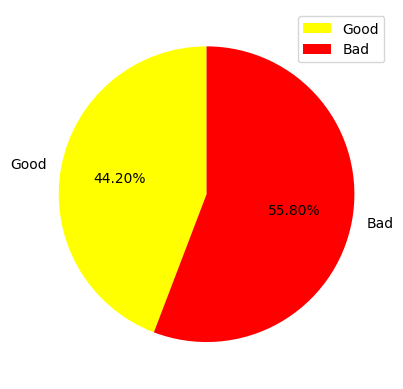

In [52]:
y = np.array([good, bad])
mylabels = ["Good", "Bad"]
myexplode = [0.2, 0]
mycolors = ['#ffff00', 'red']

plt.pie(y, labels = mylabels, startangle = 90,autopct='%2.2f%%', colors = mycolors, counterclock=True)
plt.legend()#title = 'Reviews'
# plt.savefig("%good_reviews.png", bbox_inches='tight')
# files.download('%good_reviews.png')

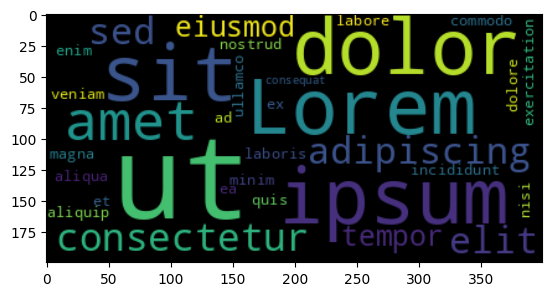

In [66]:
from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# define the text to generate the word cloud from
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat."

# create a word cloud object with default parameters
wordcloud = WordCloud().generate(text)

# display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis()
plt.show()


In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        # print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()


# wordcloud_generator = WordCloudGeneration()
# # you may uncomment the following line to use custom input
# # input_text = input("Enter the text here: ")
# input_text = 'These datasets are used for machine-learning research and have been cited in peer-reviewed academic journals. Datasets are an integral part of the field of machine learning. Major advances in this field can result from advances in learning algorithms (such as deep learning), computer hardware, and, less-intuitively, the availability of high-quality training datasets.[1] High-quality labeled training datasets for supervised and semi-supervised machine learning algorithms are usually difficult and expensive to produce because of the large amount of time needed to label the data. Although they do not need to be labeled, high-quality datasets for unsupervised learning can also be difficult and costly to produce.'
# input_text = input_text.split('.')
# clean_data = wordcloud_generator.preprocessing(input_text)
# wordcloud_generator.create_word_cloud(clean_data)

In [62]:
all_reviews = ''
review_col = rev_df.reviews

In [63]:
# type(review_col[0])
# review_col.head()
print(review_col[0])

this is the worst airline. not one thing went right. i don’t understand how they have got it so bad. late take off, no gate when we arrived. bags took over 40 minutes to arrive. horrendous


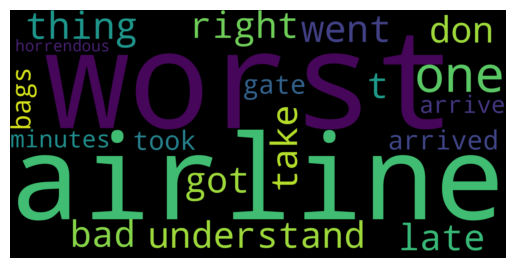

In [78]:
input_text = review_col[0]
# input_text = input_text.split('.')

# wordcloud_generator = WordCloudGeneration()

# clean_data = wordcloud_generator.preprocessing(input_text)
# wordcloud_generator.create_word_cloud(clean_data)

wordcloud_generator = WordCloud(width=1600, height=800, background_color="black").generate(input_text)
plt.imshow(wordcloud_generator, interpolation='bilinear')
plt.axis('off')
plt.show()

In [73]:
for i in review_col:
  all_reviews += i

In [74]:
print(all_reviews[:100])

this is the worst airline. not one thing went right. i don’t understand how they have got it so bad.


In [82]:
pd.DataFrame(all_reviews).unique()

ValueError: ignored

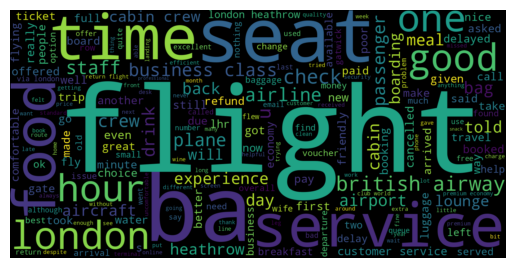

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [79]:
wordCloudGen = WordCloud(width=1600, height=800, background_color="black").generate(all_reviews)
plt.imshow(wordCloudGen, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.savefig('BA_reviews_wordcloud.jpg')
files.download("BA_reviews_wordcloud.jpg")

In [80]:
print(dir(wordCloudGen))

['__array__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_generated', '_draw_contour', '_get_bolean_mask', 'background_color', 'collocation_threshold', 'collocations', 'color_func', 'colormap', 'contour_color', 'contour_width', 'fit_words', 'font_path', 'font_step', 'generate', 'generate_from_frequencies', 'generate_from_text', 'height', 'include_numbers', 'layout_', 'margin', 'mask', 'max_font_size', 'max_words', 'min_font_size', 'min_word_length', 'mode', 'normalize_plurals', 'prefer_horizontal', 'process_text', 'random_state', 'recolor', 'regexp', 'relative_scaling', 'repeat', 'scale', 'stopwords', 'to_array', 'to_file', 'to_image', 'to_svg', 'width', 'words_']


In [53]:
print('good_percentage:{}\nbad_percentage:{}\nmean:{:.3f}\nmedian:{:.3f}'.format(good_perc, bad_perc, mean, median))

good_percentage:0.442
bad_percentage:0.558
mean:5.250
median:5.054
